# Problem statement - Dataset for classification of rice by type

### Problem Type: Classification

### Idea was to create dataset that is good for binary classification and that gives adequate results.

### Algorithams to be used:
    DecisionTreeClassifier
    KNeighborsClassifier
    LogisticRegression

### Data source: https://www.kaggle.com/mssmartypants/rice-type-classification?select=riceClassification.csv
        For educational purpose only

In [1]:
# Required libraries import
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

In [2]:
#load dataset 
data=pd.read_csv('riceClassification.csv')

In [3]:
# Provide description of the data
data.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [4]:
# Provide information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [5]:
# There are no any mssing values in the data
data.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [6]:
# List of column names Total 12 features and out of that 10 selected as input variable and 1 as output variable
data.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [7]:
# Dataset 18185 rows × 12 columns
data

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


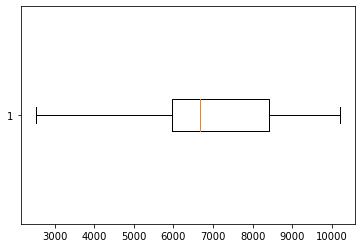

In [8]:
plt.boxplot(data['Area'],vert=False)
plt.show()

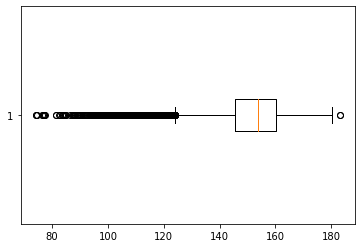

In [9]:
plt.boxplot(data['MajorAxisLength'],vert=False)
plt.show()

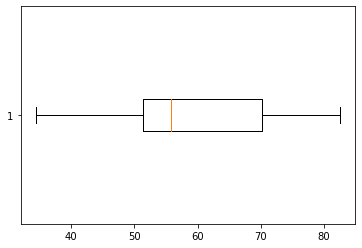

In [10]:
plt.boxplot(data['MinorAxisLength'],vert=False)
plt.show()

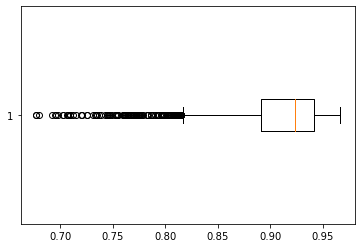

In [11]:
plt.boxplot(data['Eccentricity'],vert=False)
plt.show()

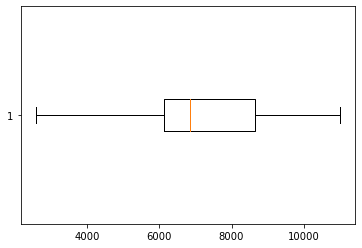

In [12]:
plt.boxplot(data['ConvexArea'],vert=False)
plt.show()

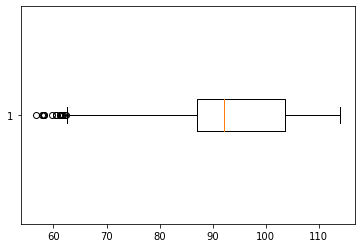

In [13]:
plt.boxplot(data['EquivDiameter'],vert=False)
plt.show()

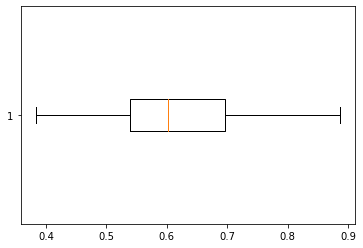

In [14]:
plt.boxplot(data['Extent'],vert=False)
plt.show()

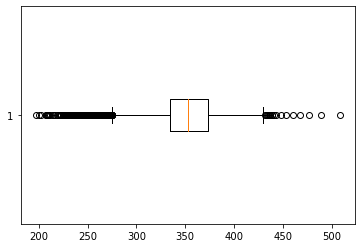

In [15]:
plt.boxplot(data['Perimeter'],vert=False)
plt.show()

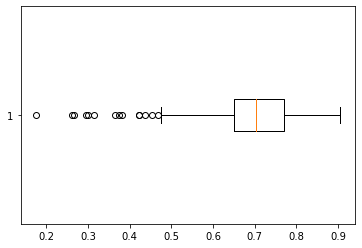

In [16]:
plt.boxplot(data['Roundness'],vert=False)
plt.show()

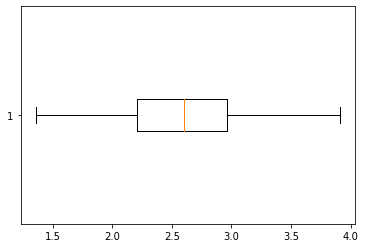

In [17]:
plt.boxplot(data['AspectRation'],vert=False)
plt.show()

In [18]:
# Check the corelation in data
data.corr()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
id,1.000000,0.709155,0.464022,0.637148,-0.347816,0.707600,0.706333,0.149924,0.628830,0.430033,-0.382648,-0.808591
Area,0.709155,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.464022,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.637148,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.347816,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.707600,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.706333,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.149924,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.628830,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.430033,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759


In [19]:
# create input Dataset 
X= data.drop(columns=['id','Class'])
# create output dataset
y= data['Class']

In [23]:
# Give training and testing dataset to model 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

# Initiate the DecisionTreeClassifier 
model_d= DecisionTreeClassifier()
# Train the model with 80% of training data 
model_d= model_d.fit(X_train,y_train)
# Test model predtiction using DecisionTreeClassifier
predictions_d=model_d.predict(X_test)
#check the accuracy score using DecisionTreeClassifier 
score_d = accuracy_score(y_test,predictions_d)


# Initiate KNeighborsClassifier
model_k= KNeighborsClassifier(n_neighbors=3)
# Train the model with 80% of training data 
model_k=model_k.fit(X_train,y_train)
# Test model predtiction using KNeighborsClassifier
predictions_k=model_k.predict(X_test)
#check the accuracy score  
score_k = accuracy_score(y_test,predictions_k)


#initiate the LogisticRegression 
model_l= LogisticRegression()
# Train the LogisticRegression model with 80% of training data 
model_l= model_l.fit(X_train,y_train)
# Test LogisticRegression model predtiction  
predictions_l =model_l.predict(X_test)
#check the LogisticRegression accuracy score  
score_l = accuracy_score(y_test,predictions_l)
score_l

print("Score using DecisionTreeClassifier", score_d)
print("Score using KNeighborsClassifier", score_k)
print("Score using LogisticRegression", score_l)

# Find out the best score from all 3 algorithams
if (score_d >= score_k) and (score_d >= score_l):
    best_score = score_d
elif (score_k >= score_d) and (score_k >= score_l):
    best_score = score_k
else:
    best_score = score_l

print("\n\n The best score given is", best_score)

Score using DecisionTreeClassifier 0.983502886994776
Score using KNeighborsClassifier 0.9843277426450371
Score using LogisticRegression 0.9890019246631839


 The best score given is 0.9890019246631839


C:\Users\Nilesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Expecting result to be 1 - Got correct result
model_d.predict([[4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796]])

array([1], dtype=int64)

In [25]:
# Expecting result to be 1 - Got correct result
model_k.predict([[4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796]])

array([1], dtype=int64)

In [27]:
# Expecting result to be 1 - This algoritham is not predicting the correct result
model_l.predict([[4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796]])

array([0], dtype=int64)

In [28]:
cm_d=confusion_matrix(y_test,predictions_d)
cm_d

array([[1636,   25],
       [  35, 1941]], dtype=int64)

In [29]:
cm_k=confusion_matrix(y_test,predictions_k)
cm_k

array([[1618,   43],
       [  14, 1962]], dtype=int64)

In [30]:
cm_l=confusion_matrix(y_test,predictions_l)
cm_l

array([[1637,   24],
       [  16, 1960]], dtype=int64)

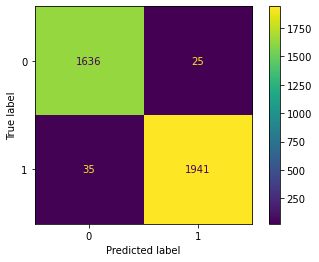

In [31]:
disp_d = ConfusionMatrixDisplay(confusion_matrix=cm_d, display_labels=model_d.classes_)
disp_d.plot()
plt.show()

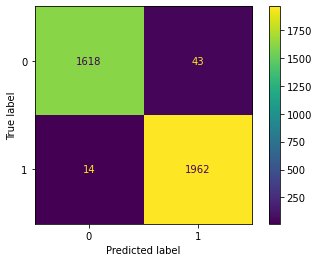

In [32]:
disp_k = ConfusionMatrixDisplay(confusion_matrix=cm_k, display_labels=model_k.classes_)
disp_k.plot()
plt.show()

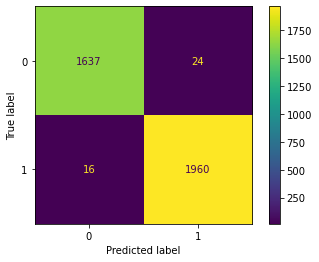

In [33]:
disp_l = ConfusionMatrixDisplay(confusion_matrix=cm_l, display_labels=model_l.classes_)
disp_l.plot()
plt.show()

In [34]:
print(classification_report(y_test,predictions_d))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1661
           1       0.99      0.98      0.98      1976

    accuracy                           0.98      3637
   macro avg       0.98      0.98      0.98      3637
weighted avg       0.98      0.98      0.98      3637



In [35]:
print(classification_report(y_test,predictions_k))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1661
           1       0.98      0.99      0.99      1976

    accuracy                           0.98      3637
   macro avg       0.98      0.98      0.98      3637
weighted avg       0.98      0.98      0.98      3637



In [36]:
print(classification_report(y_test,predictions_l))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1661
           1       0.99      0.99      0.99      1976

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



### Conclusion:
    Classification of two types of rice using different features MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation has been successfully completed here with an average classification accuracy of 98.00%, The scope of this work may be extended towards quality.